In [1]:
import os
import numpy as np
import scipy.io
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.stats.multicomp as mc

sns.set_context('paper')
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plottingfunctions as pfs

In [3]:
FolderName = '/Users/seethakrishnan/Desktop/CFCPaperScripts/BehaviorData/'
SaveFigureFolder = '/Users/seethakrishnan/Library/CloudStorage/Box-Box/WorkingManuscripts/CFCBehavior/Plots/'

In [4]:
df = pd.read_pickle(os.path.join(FolderName, 'all_combined_Paradigm2.pkl'))
# df = df[df['Animal']!='m8-5']

In [5]:
df['Paradigm'].unique()
df['Paradigm_New'] = [x.split('_')[0] if x.find('RecallDay')==0 else x for x in df['Paradigm']]

Before
Firstlapfreezing
(12,) (12,)
tstat: 0.010, p-value: 0.992
VR: VR1
 Mean: 17.54
 Median: 14.88
 STD: 8.86
 CI: 5.88
VR: VR2
 Mean: 17.52
 Median: 13.55
 STD: 9.71
 CI: 6.44
Averagefreezing
(12,) (12,)
tstat: 0.626, p-value: 0.544
VR: VR1
 Mean: 28.75
 Median: 29.33
 STD: 10.78
 CI: 7.15
VR: VR2
 Mean: 26.99
 Median: 27.57
 STD: 5.93
 CI: 3.94
Firstlap_time
(12,) (12,)
tstat: 0.225, p-value: 0.826
VR: VR1
 Mean: 19.43
 Median: 16.30
 STD: 16.05
 CI: 10.65
VR: VR2
 Mean: 18.92
 Median: 11.57
 STD: 15.19
 CI: 10.08
Avglaptime
(12,) (12,)
tstat: 0.100, p-value: 0.922
VR: VR1
 Mean: 23.44
 Median: 15.10
 STD: 18.11
 CI: 12.02
VR: VR2
 Mean: 22.98
 Median: 16.63
 STD: 12.69
 CI: 8.42
Before
Firstlapfreezing
(12,) (12,)
tstat: 2.022, p-value: 0.068
VR: VR1
 Mean: 24.72
 Median: 16.04
 STD: 15.91
 CI: 10.56
VR: VR2
 Mean: 16.37
 Median: 14.38
 STD: 5.98
 CI: 3.97
Averagefreezing
(12,) (12,)
tstat: 1.489, p-value: 0.165
VR: VR1
 Mean: 34.31
 Median: 34.74
 STD: 6.24
 CI: 4.14
VR: VR2
 Mea

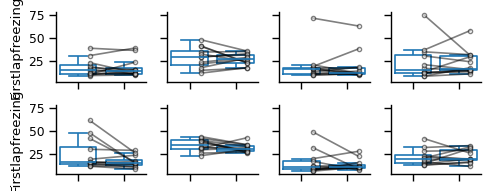

In [6]:
fs, ax = plt.subplots(2, 4, sharey='all', figsize=(5, 5))
# ax = ax.flatten()
column_names = ['Firstlapfreezing', 'Averagefreezing', 'Firstlap_time', 'Avglaptime']

print('Before')
sub_data = df[df['Paradigm']=='Control']
pfs.plot_columns(ax[0, :], sub_data, column_names)

print('Before')
sub_data = df[df['Paradigm']=='Before']
pfs.plot_columns(ax[1, :], sub_data, column_names)

# print('RecallDay')
# sub_data = df[df['Paradigm'].str.contains('RecallDay1')]
# pfs.plot_columns(ax[2, :], sub_data, column_names)

for a in ax.flatten():
    a.set_xticklabels([])
    a.set_xlabel('')
sns.despine(fs)
fs.set_size_inches((5, 2))
fs.tight_layout()
# fs.savefig(os.path.join(SaveFigureFolder, 'NovNovControlCFCrunningbehavior.pdf'), bbox_inches='tight')

RecallDay
Firstlapfreezing
(12,) (12,)
tstat: -2.569, p-value: 0.026
VR: VR1
 Mean: 16.50
 Median: 16.86
 STD: 4.74
 CI: 3.15
VR: VR2
 Mean: 23.19
 Median: 24.40
 STD: 8.66
 CI: 5.75
Averagefreezing
(12,) (12,)
tstat: -0.270, p-value: 0.792
VR: VR1
 Mean: 30.32
 Median: 31.75
 STD: 9.41
 CI: 6.25
VR: VR2
 Mean: 31.06
 Median: 32.08
 STD: 9.14
 CI: 6.07
Firstlap_time
(12,) (12,)
tstat: -4.623, p-value: 0.001
VR: VR1
 Mean: 14.27
 Median: 13.18
 STD: 4.30
 CI: 2.85
VR: VR2
 Mean: 25.68
 Median: 28.55
 STD: 8.36
 CI: 5.55
Avglaptime
(12,) (12,)
tstat: -0.604, p-value: 0.558
VR: VR1
 Mean: 21.73
 Median: 18.45
 STD: 12.22
 CI: 8.11
VR: VR2
 Mean: 24.27
 Median: 23.65
 STD: 9.59
 CI: 6.36
[-5.9283521  -2.96807379  0.8007513   1.13098839  1.20435428  3.78904124
  5.49650343  5.63118519 13.76267921 16.55467822 17.84521137 22.89923976]
[-20.75660123  -9.67793727  -2.83525545  -2.79140903  -1.76353053
  -1.22182518   2.7245981    5.13699319   6.83755807  10.22150416
  11.37874778  11.60974304]


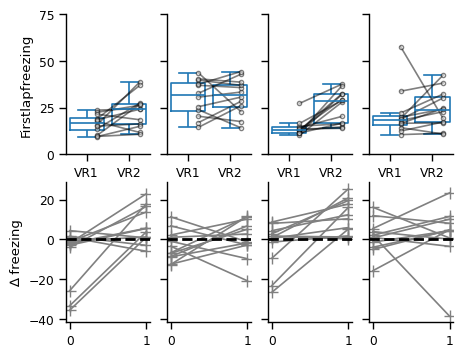

In [7]:
fs, ax = plt.subplots(2, 4, sharey='row')
column_names = ['Firstlapfreezing', 'Averagefreezing', 'Firstlap_time', 'Avglaptime']

print('RecallDay')
sub_data = df[df['Paradigm'].str.contains('RecallDay1')]
pfs.plot_columns(ax[0, :], sub_data, column_names)

pfs.plot_delta_columns(ax[1, :], df, column_names)
for a in ax[0, :]:
    a.set_ylim((0, 75))
    a.locator_params(nbins=3, axis='y')
#     a.set_xticklabels([])
#     a.set_xlabel('')
sns.despine(fs)
fs.set_size_inches((5, 4))
fs.savefig(os.path.join(SaveFigureFolder, 'NovNovRecallDayCFCrunningbehavior.pdf'), bbox_inches='tight')

Firstlapfreezing
Familiar VR
16.50, 3.15
CFC VR
23.19, 5.75
(12,) (12,)
Day: RecallDay1, tstst -2.569, p-value 0.026
Familiar VR
13.96, 4.24
CFC VR
21.34, 6.79
(8,) (8,)
Day: RecallDay2, tstst -2.019, p-value 0.083
Averagefreezing
Familiar VR
30.32, 6.25
CFC VR
31.06, 6.07
(12,) (12,)
Day: RecallDay1, tstst -0.270, p-value 0.792
Familiar VR
33.35, 6.11
CFC VR
35.88, 5.89
(8,) (8,)
Day: RecallDay2, tstst -2.437, p-value 0.045


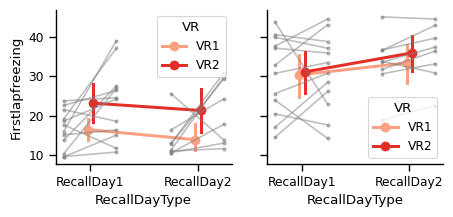

In [8]:
order = ['RecallDay1', 'RecallDay2']
columns = [ 'Firstlapfreezing', 'Averagefreezing']

sub_data = df[(df['Paradigm'].str.contains('RecallDay'))]
sub_data['RecallDayType'] = sub_data['Paradigm'].str.split('_').str.get(0)

sub_data1 = df[(df['Paradigm'].str.contains('RecallDay')) & (df['VR']=='VR1')]
sub_data2 = df[(df['Paradigm'].str.contains('RecallDay')) & (df['VR']=='VR2')]
sub_data1['RecallDayType'] = sub_data1['Paradigm'].str.split('_').str.get(0)
sub_data2['RecallDayType'] = sub_data2['Paradigm'].str.split('_').str.get(0)

fs, ax = plt.subplots(1, 2, figsize=(5, 3), sharey='all')
for n, c in enumerate(columns):
    print(c)
    sns.pointplot(data=sub_data, x='RecallDayType', y=c, hue='VR', palette='Reds',
              dodge=True, ax=ax[n])
    for n2, ord in enumerate(order):
        data1 = sub_data1[sub_data1['RecallDayType']==ord][c]
        data2 = sub_data2[sub_data2['RecallDayType']==ord][c]
        print('Familiar VR')
        m, ci = pfs.mean_confidence_interval(data1)
        print('%0.2f, %0.2f' %(m, ci))
        print('CFC VR')
        m, ci = pfs.mean_confidence_interval(data2)
        print('%0.2f, %0.2f' %(m, ci))
        print(np.shape(data1), np.shape(data2))
        t, p = scipy.stats.ttest_rel(data1, data2)
        print('Day: %s, tstst %0.3f, p-value %0.3f' %(ord, t, p))

        ax[n].plot([n2-0.25, n2+0.24], [data1, data2], '.-', color='grey', markersize=4, alpha=0.5) 
sns.despine(fs)
fs.set_size_inches((5, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'CFCBehavior_byrecallday_Novel.pdf'), bbox_inches='tight')

Firstlapfreezing
Familiar VR
24.72, 10.56
CFC VR
16.37, 3.97
Day: Before, tstst 2.022, p-value 0.068
Familiar VR
16.50, 3.15
CFC VR
23.19, 5.75
Day: RecallDay1, tstst -2.569, p-value 0.026
Familiar VR
13.96, 4.24
CFC VR
21.34, 6.79
Day: RecallDay2, tstst -2.019, p-value 0.083
Averagefreezing
Familiar VR
34.31, 4.14
CFC VR
31.08, 2.92
Day: Before, tstst 1.489, p-value 0.165
Familiar VR
30.32, 6.25
CFC VR
31.06, 6.07
Day: RecallDay1, tstst -0.270, p-value 0.792
Familiar VR
33.35, 6.11
CFC VR
35.88, 5.89
Day: RecallDay2, tstst -2.437, p-value 0.045


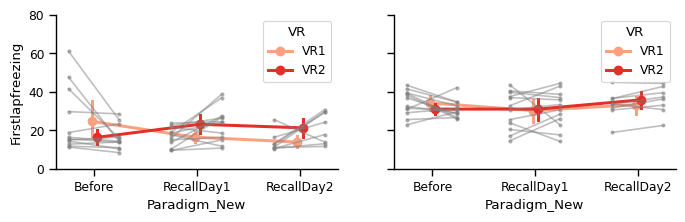

In [9]:
order = ['Before', 'RecallDay1', 'RecallDay2']
columns = [ 'Firstlapfreezing', 'Averagefreezing']

sub_data1 = df[(df['Paradigm_New'].isin(order)) & (df['VR']=='VR1')]
sub_data2 = df[(df['Paradigm_New'].isin(order)) & (df['VR']=='VR2')]

fs, ax = plt.subplots(1, 2, figsize=(5, 3), sharey='all')
for n, c in enumerate(columns):
    print(c)
    sns.pointplot(data=df[df['Paradigm_New'].isin(order)], x='Paradigm_New', y=c, order=order, hue='VR', palette='Reds',
              dodge=True, ax=ax[n])
    for n2, ord in enumerate(order):
        data1 = sub_data1[sub_data1['Paradigm_New']==ord][c]
        data2 = sub_data2[sub_data2['Paradigm_New']==ord][c]

        print('Familiar VR')
        m, ci = pfs.mean_confidence_interval(data1)
        print('%0.2f, %0.2f' %(m, ci))
        print('CFC VR')
        m, ci = pfs.mean_confidence_interval(data2)
        print('%0.2f, %0.2f' %(m, ci))
        t, p = scipy.stats.ttest_rel(data1, data2)
        print('Day: %s, tstst %0.3f, p-value %0.3f' %(ord, t, p))
        ax[n].plot([n2-0.25, n2+0.24], [data1, data2], '.-', color='grey', markersize=4, alpha=0.5) 
        ax[n].set_ylim((0, 80))
sns.despine(fs)
fs.set_size_inches((8, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'CFCBehavior_byrecallday_NovNov_Before.pdf'), bbox_inches='tight')

### Save in R

In [10]:
df_for_R = df[['Firstlapfreezing', 'Averagefreezing', 'Paradigm_New', 'Animal', 'VR']]
order = ['Before', 'RecallDay1', 'RecallDay2']


df_for_R = df_for_R.loc[df_for_R['Paradigm_New'].isin(order)]
df_for_R['Paradigm_dummy'] = pd.factorize(df_for_R['Paradigm_New'], sort=True)[0]

df_for_R.to_csv('/Users/seethakrishnan/Library/CloudStorage/Box-Box/WorkingManuscripts/CFCBehavior/R_data/NovNov.csv')

## Licking Behavior

In [11]:
df2 = pd.read_pickle(os.path.join(FolderName, 'all_combined_Paradigm2.pkl'))

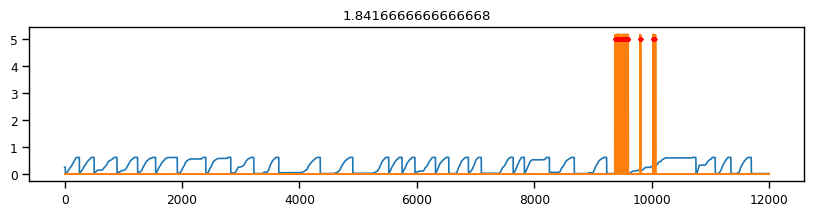

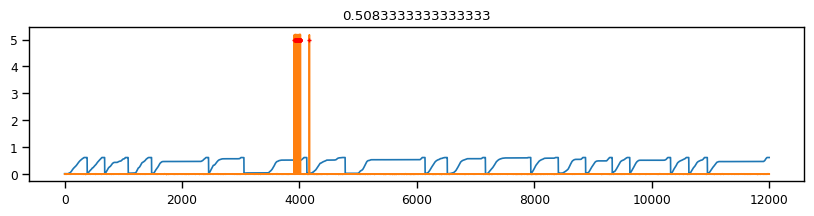

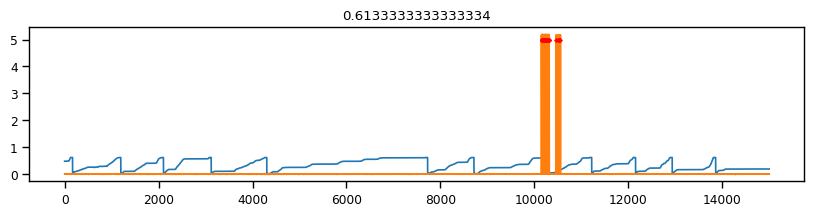

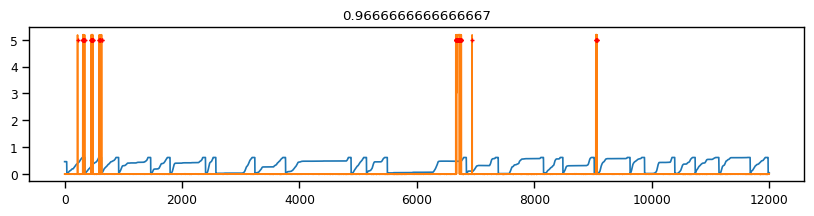

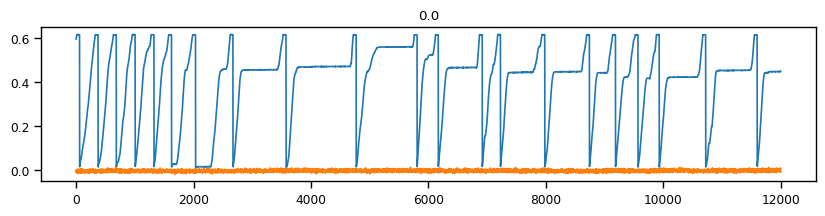

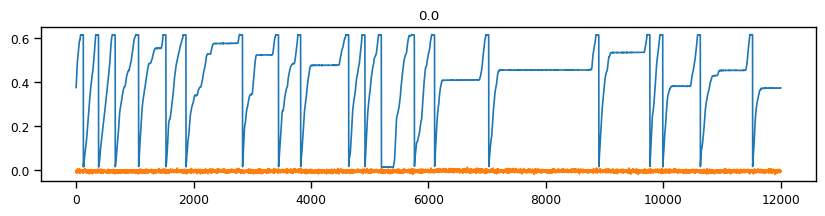

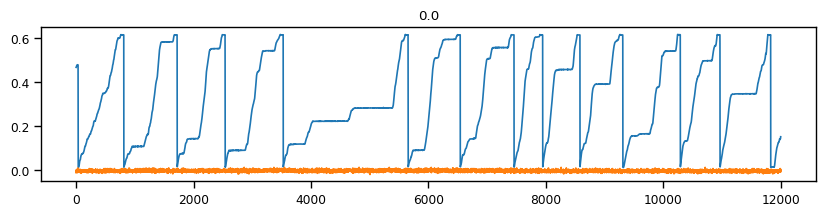

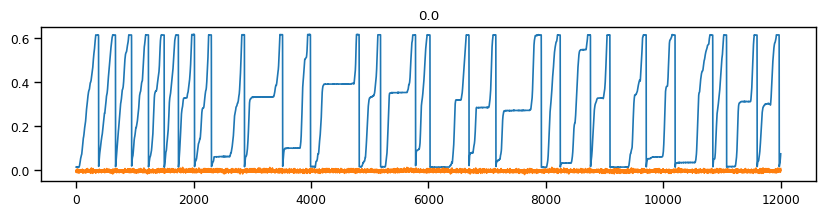

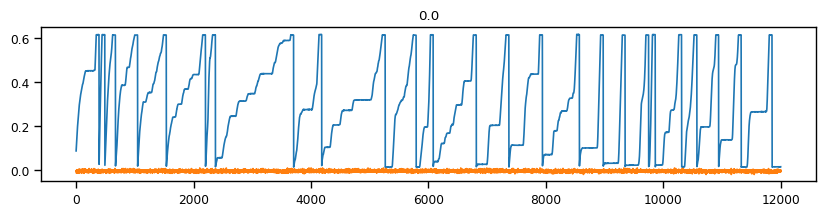

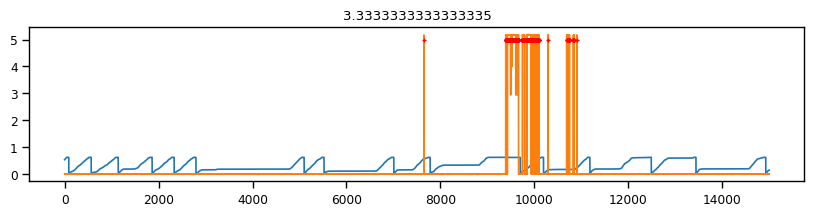

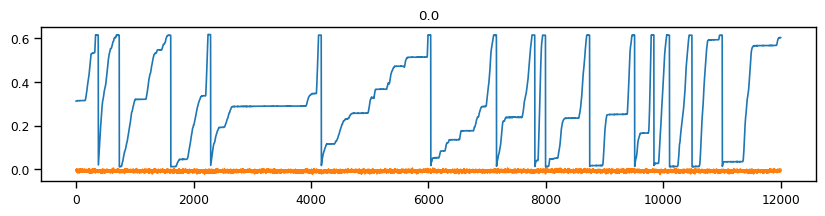

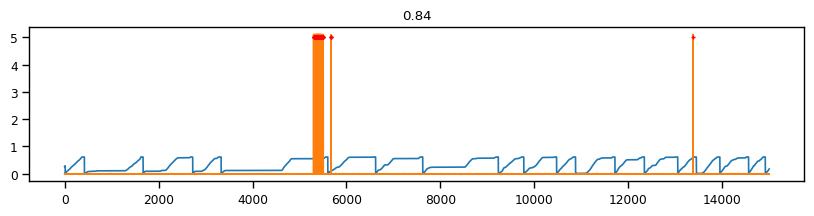

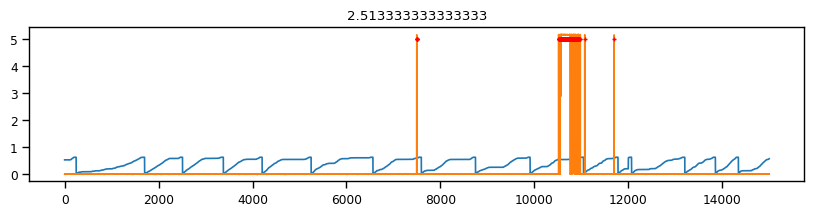

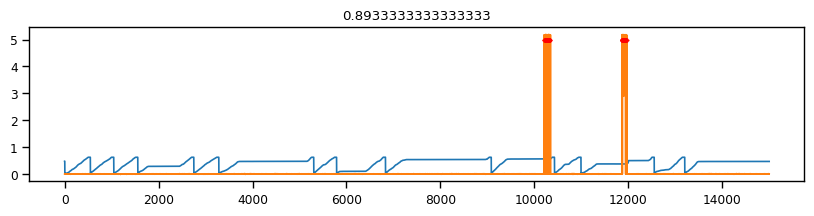

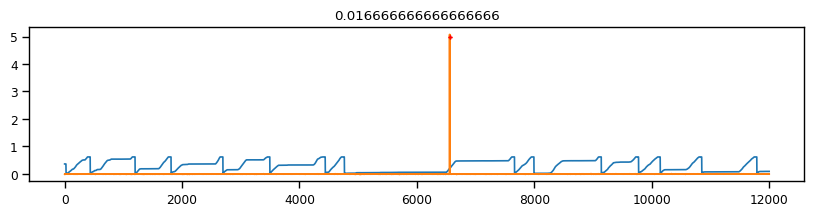

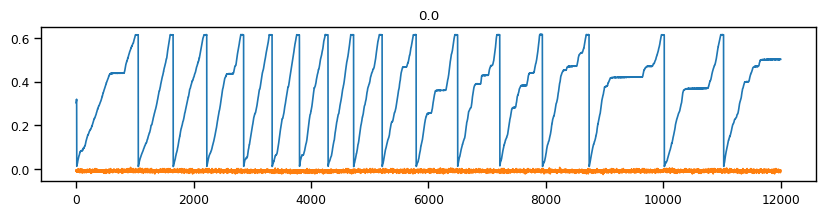

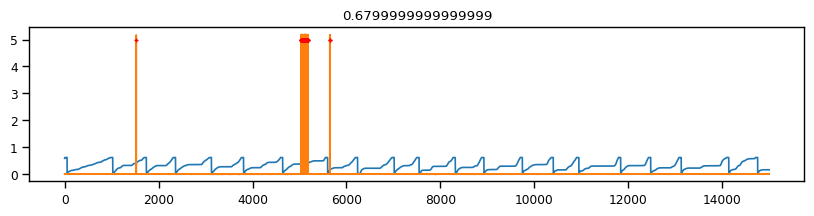

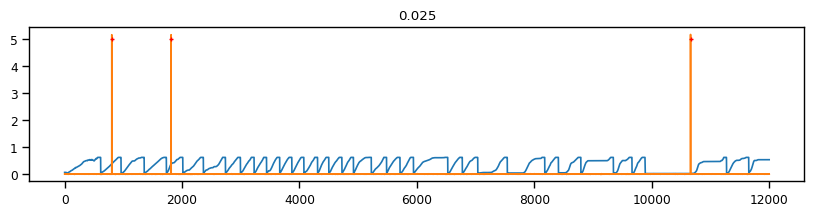

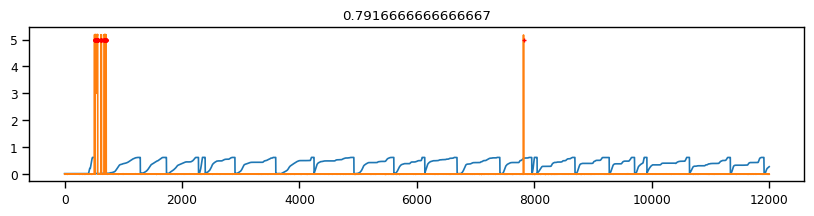

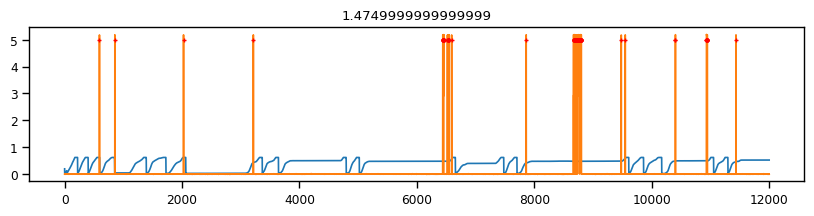

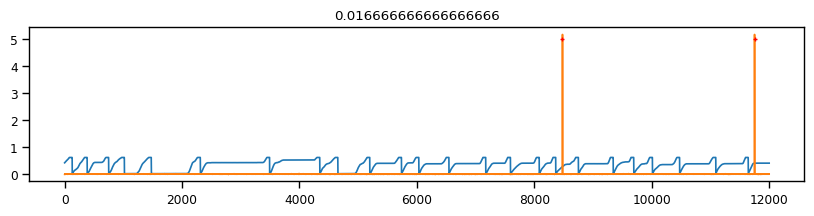

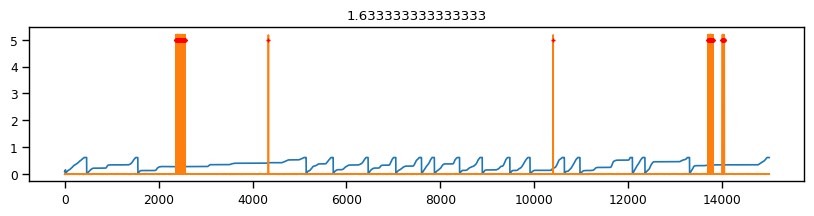

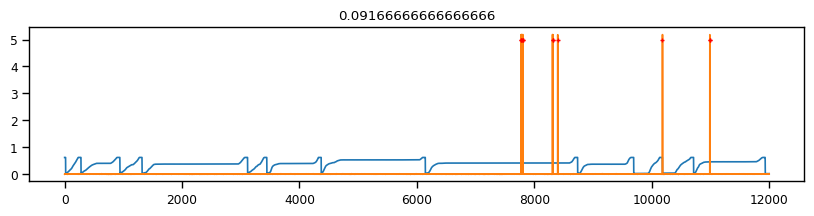

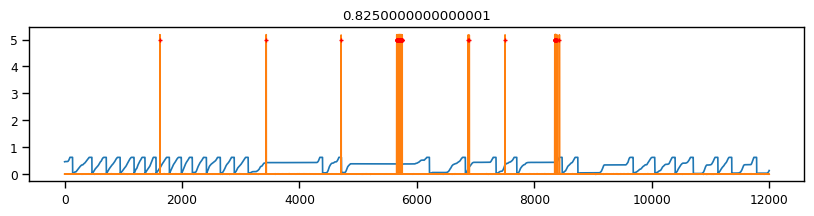

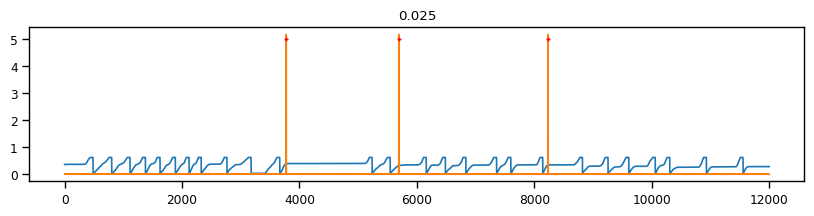

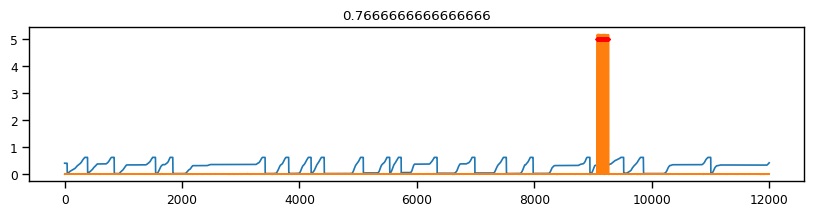

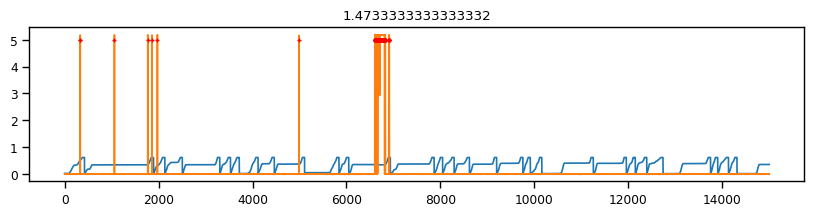

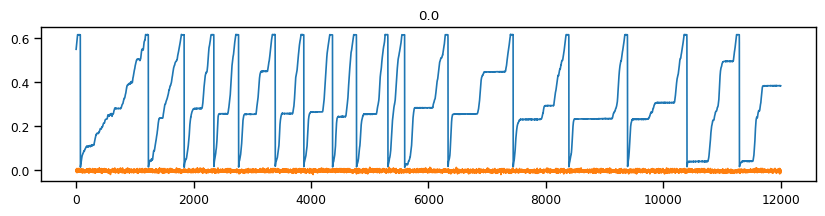

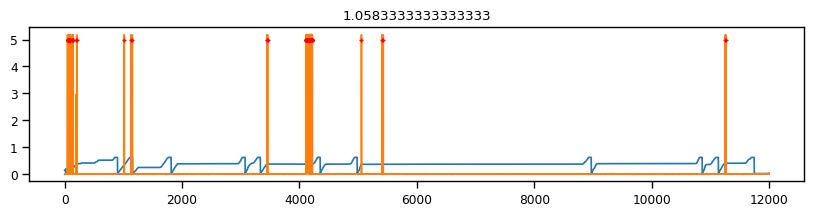

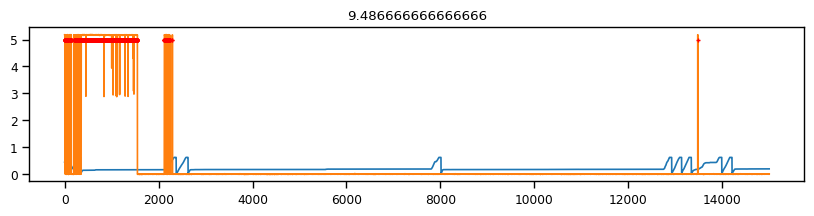

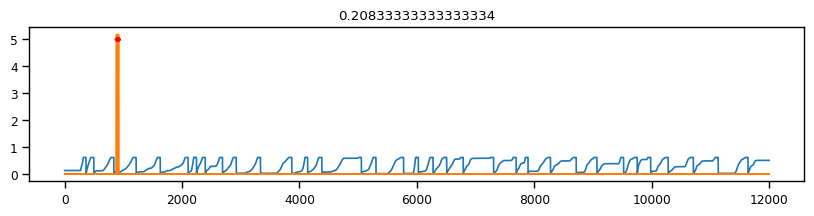

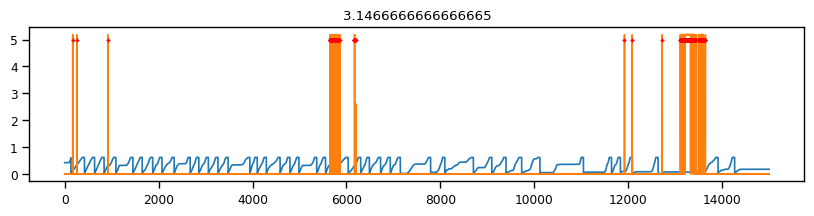

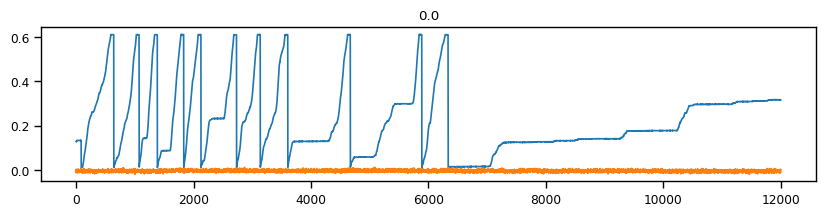

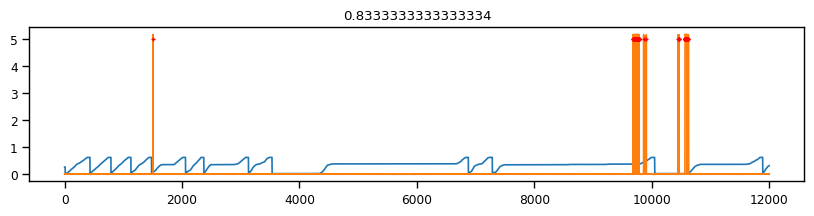

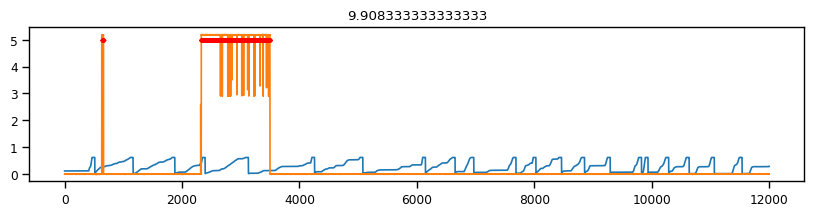

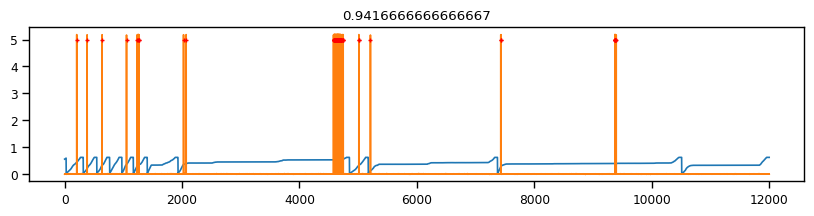

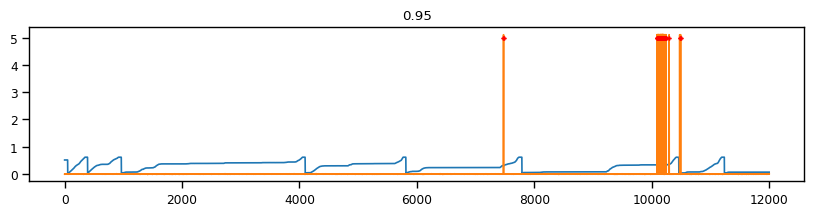

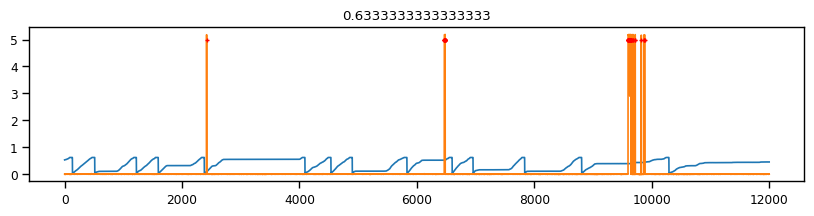

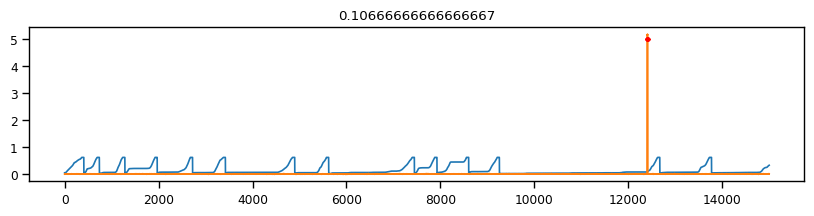

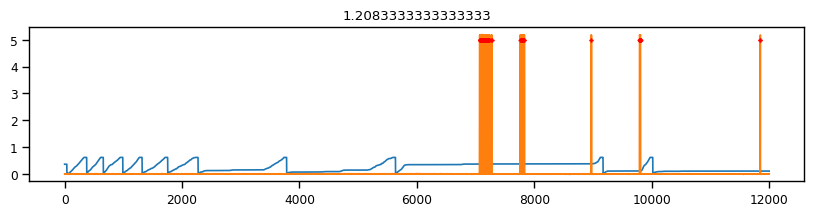

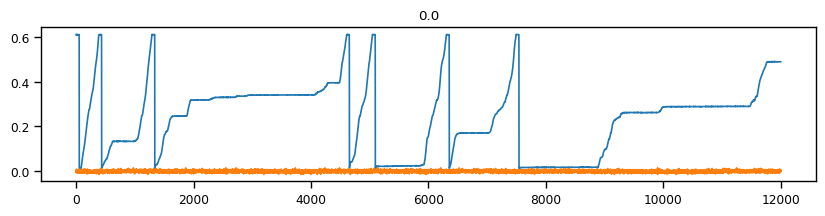

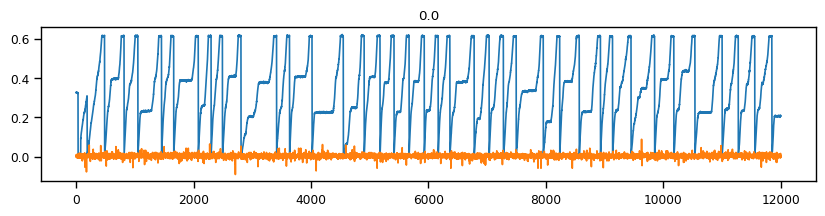

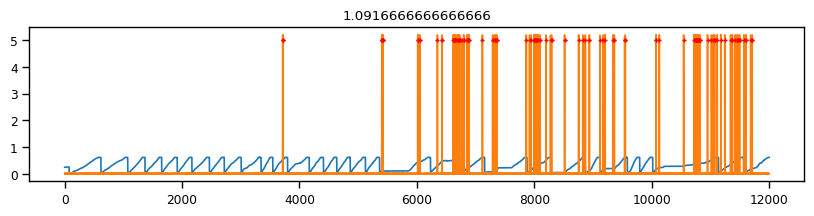

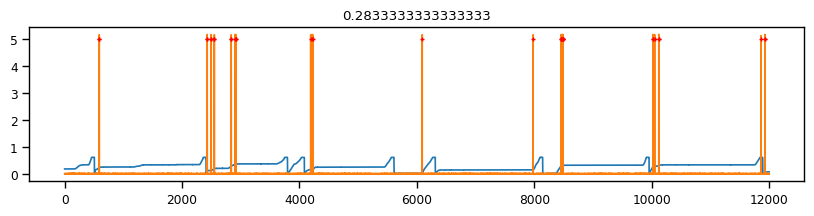

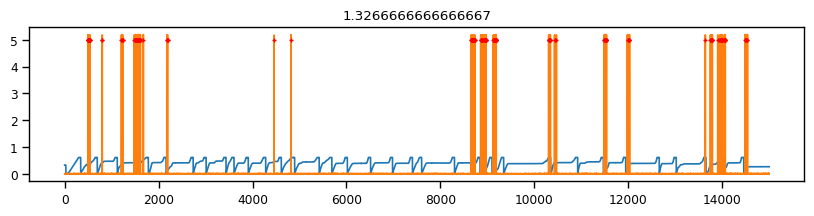

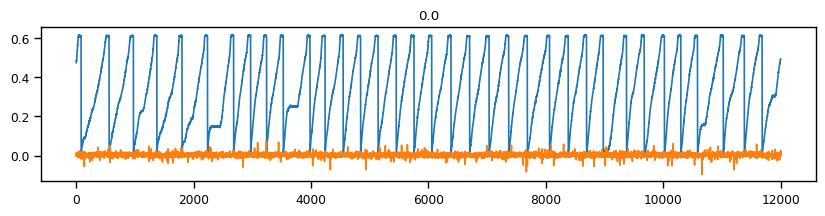

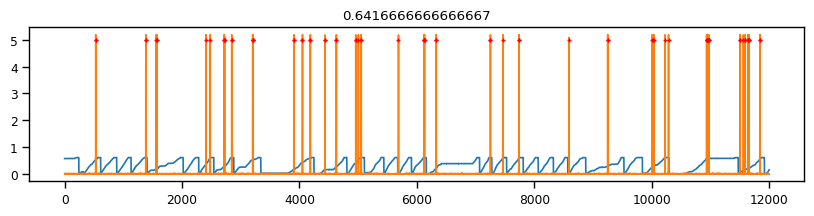

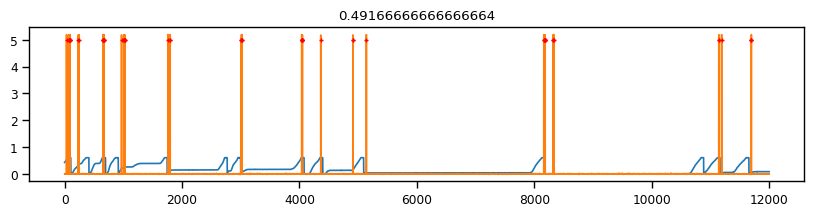

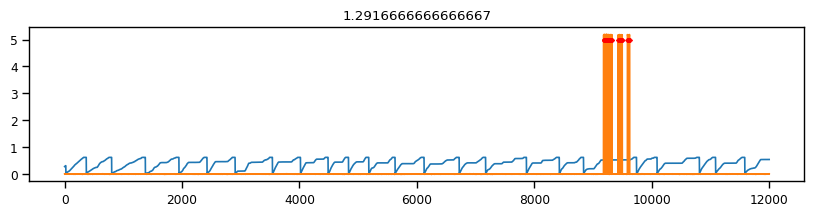

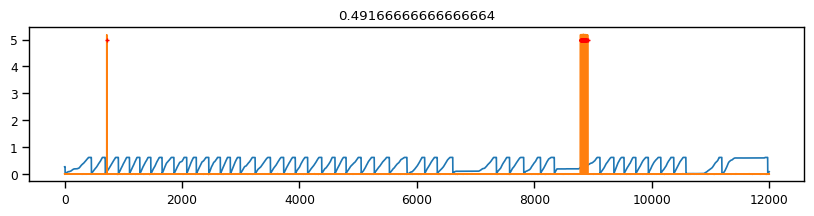

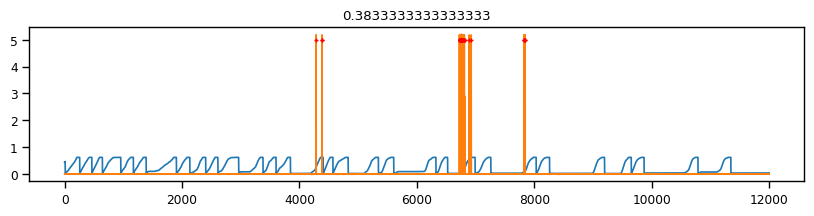

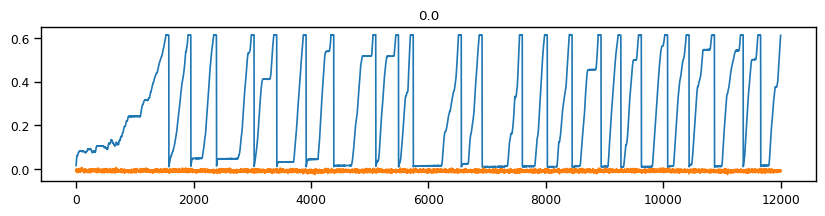

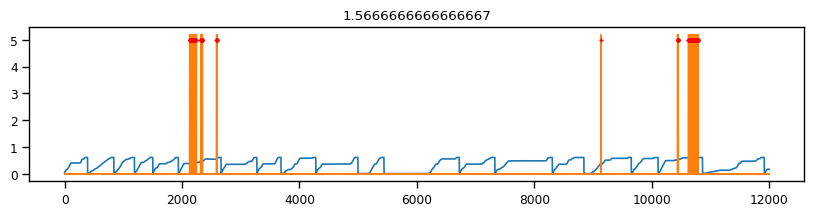

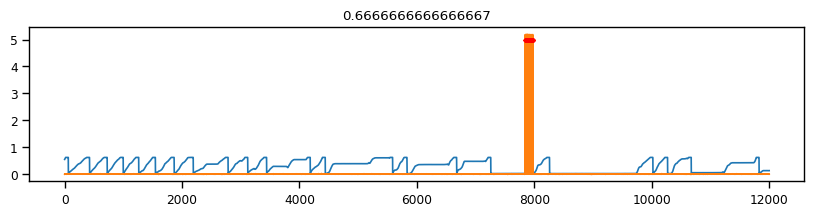

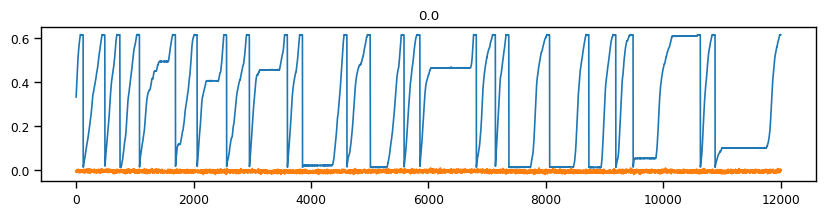

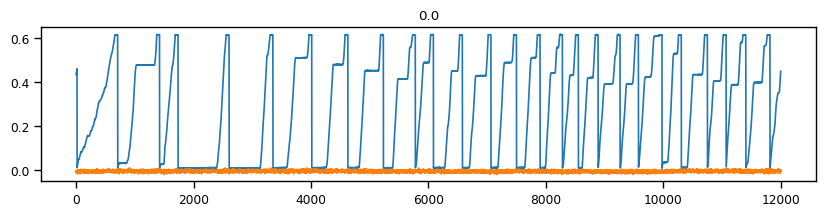

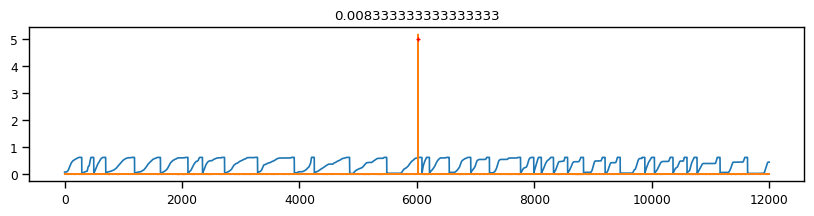

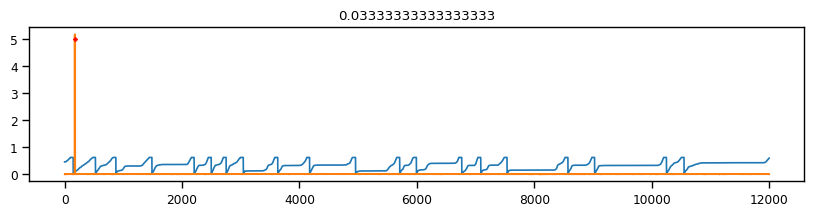

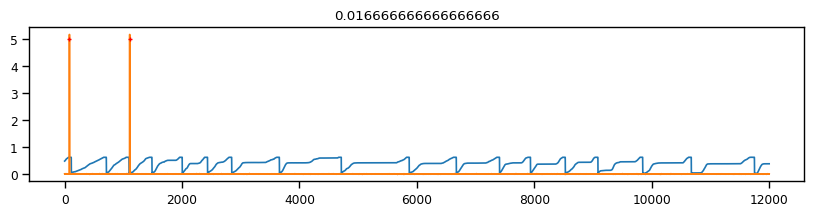

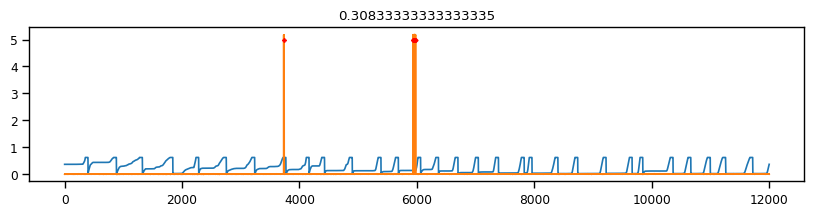

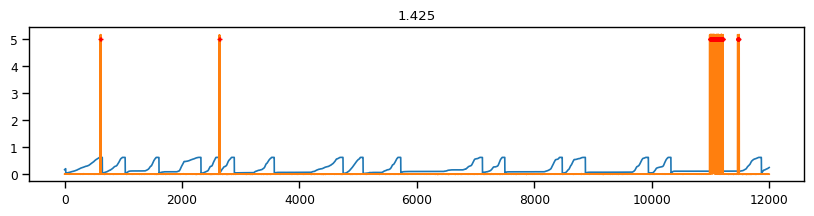

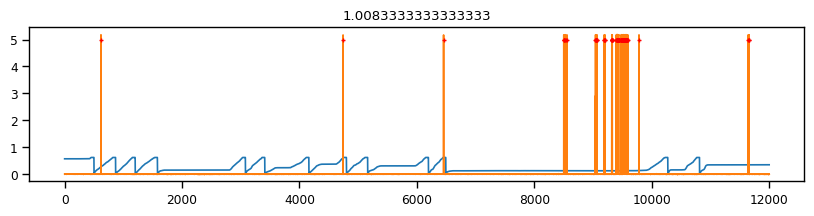

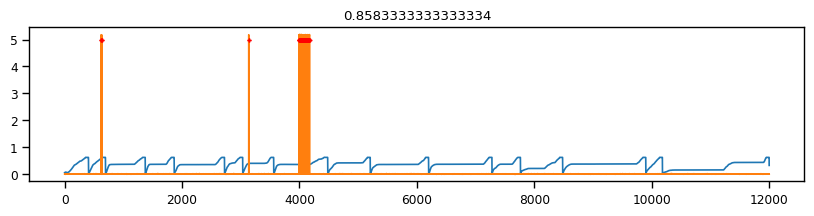

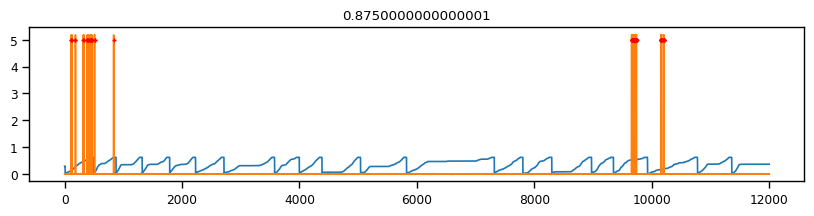

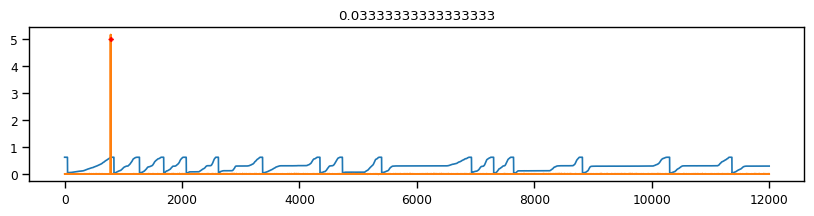

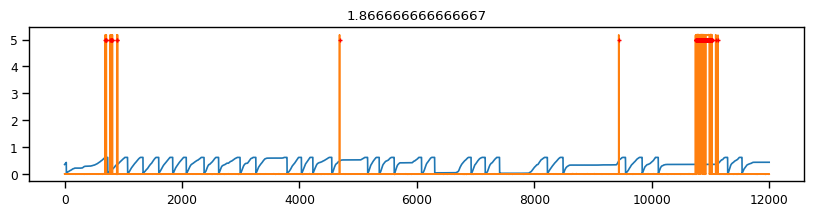

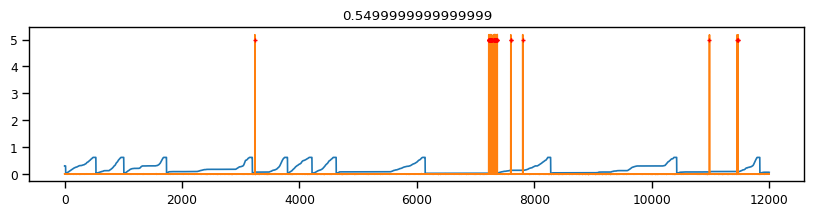

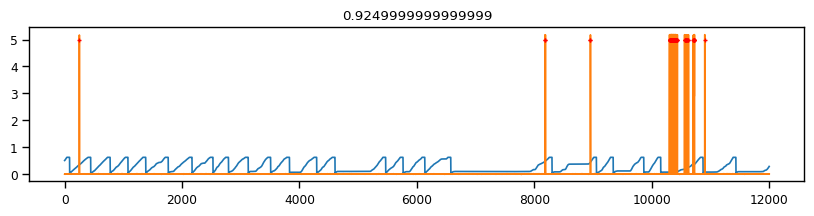

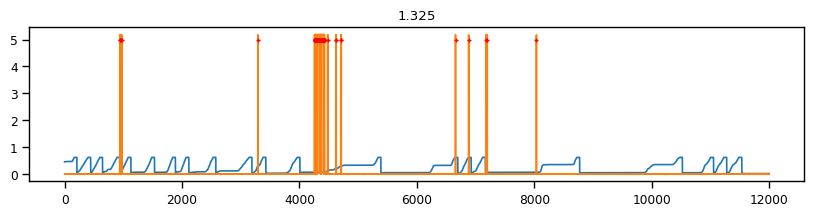

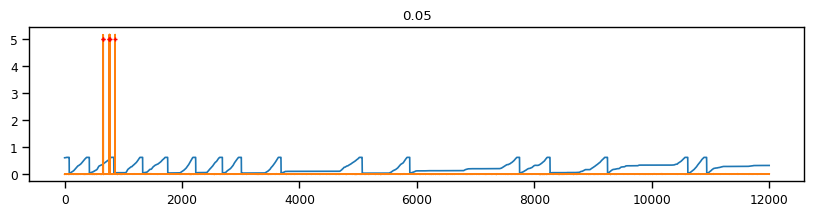

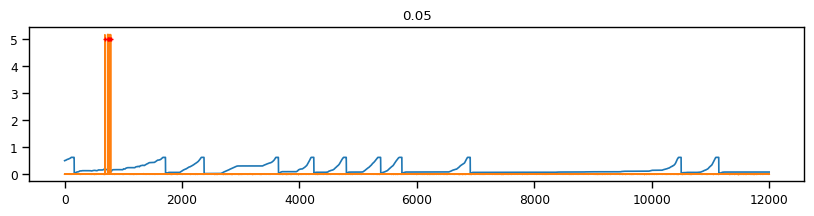

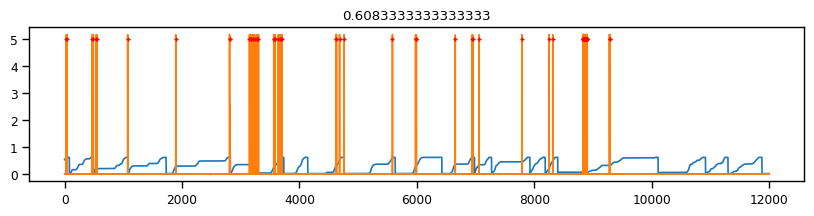

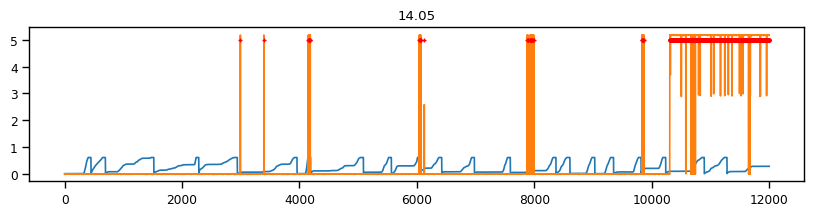

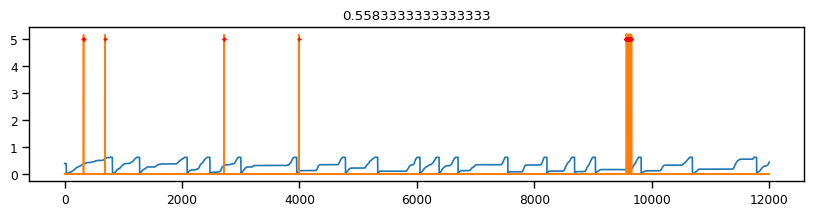

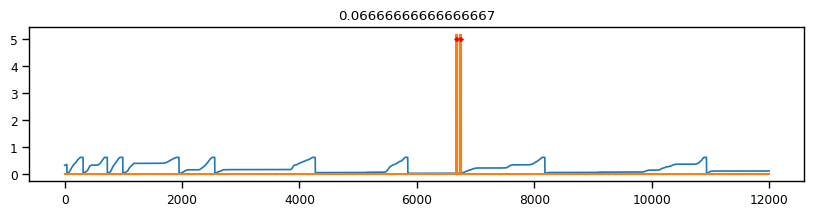

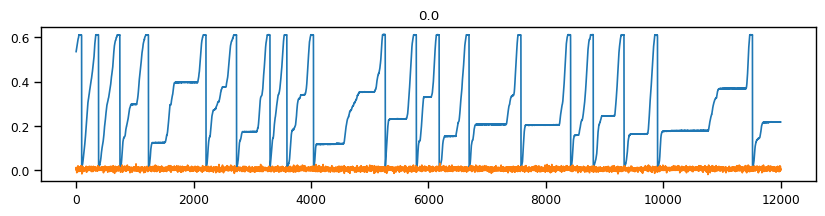

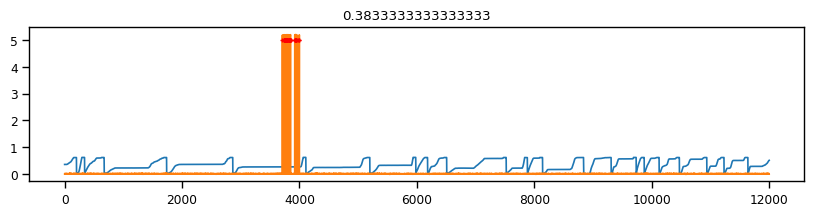

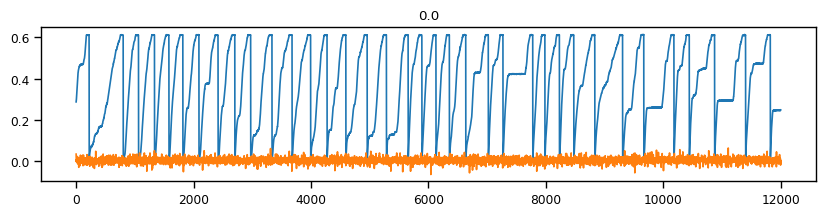

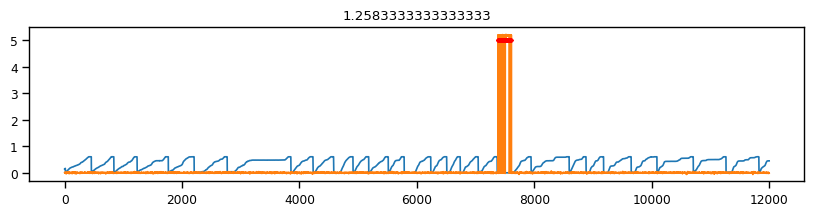

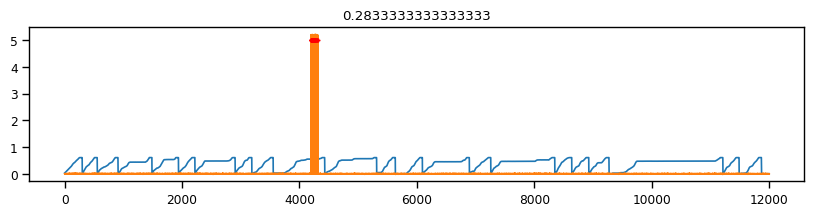

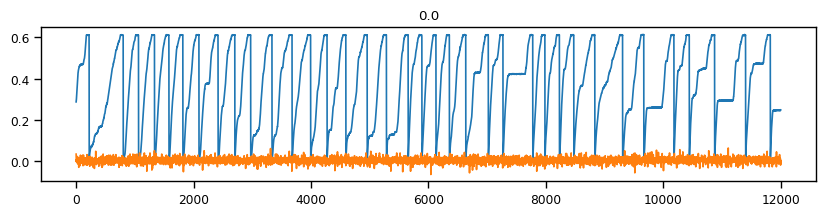

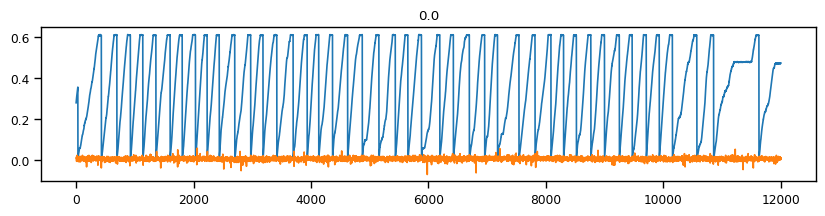

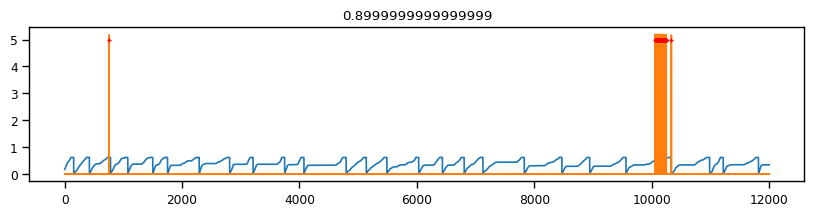

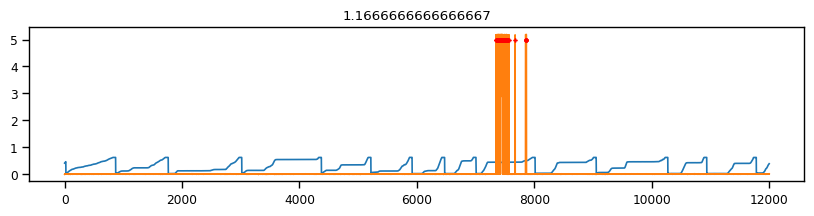

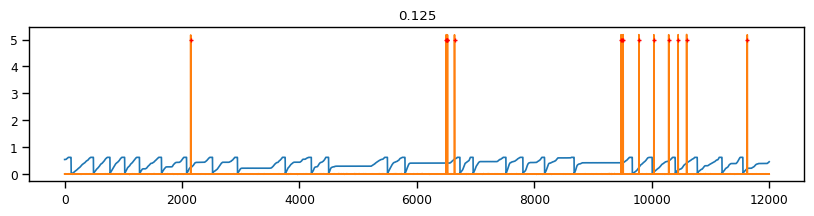

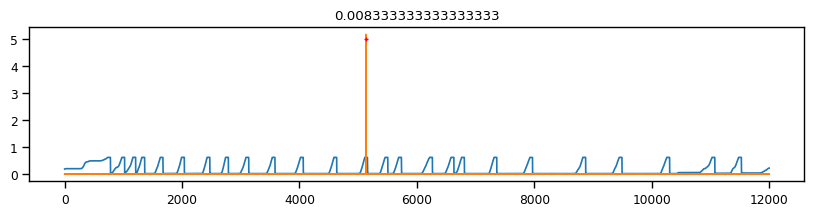

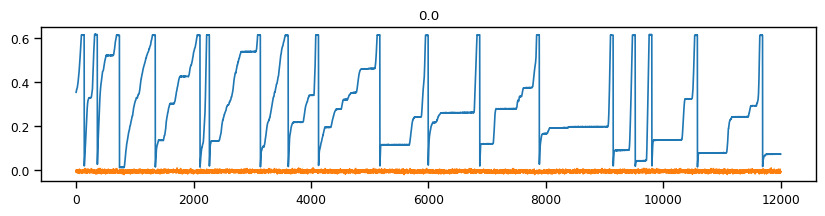

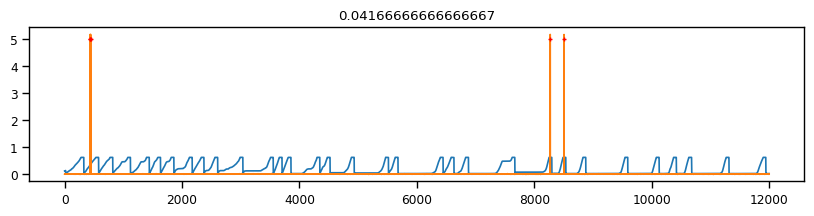

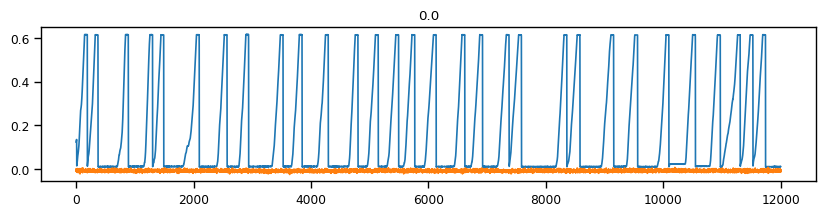

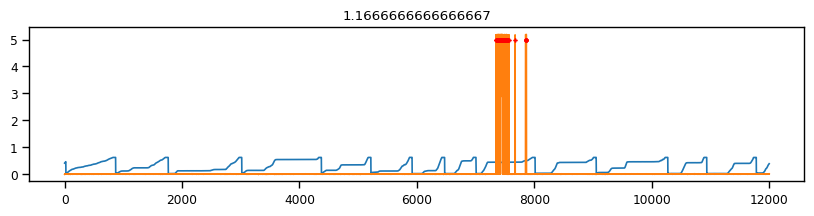

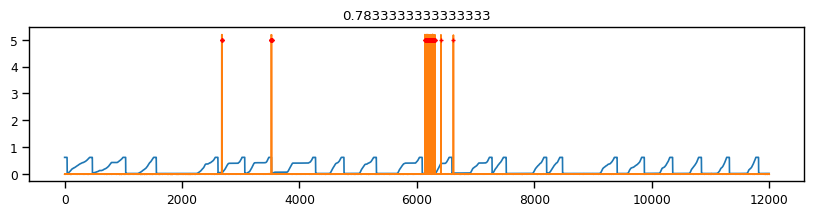

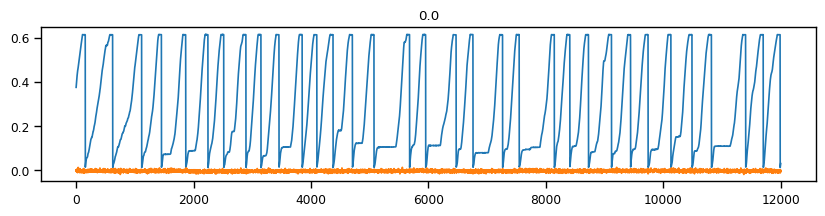

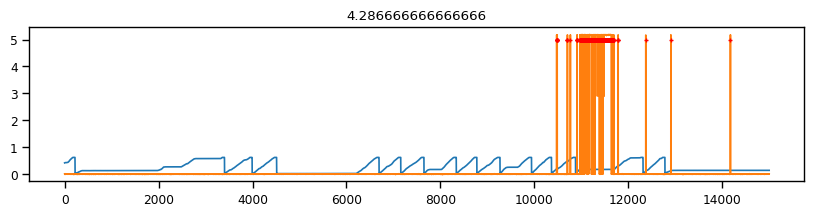

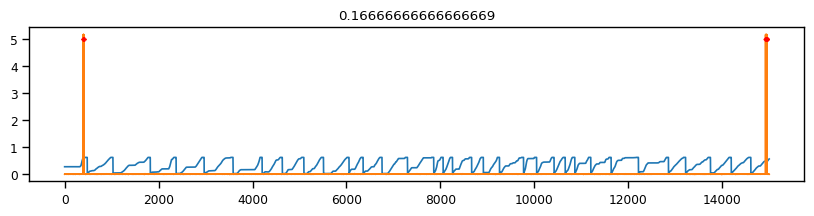

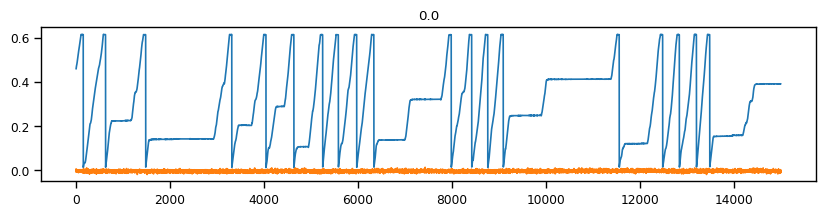

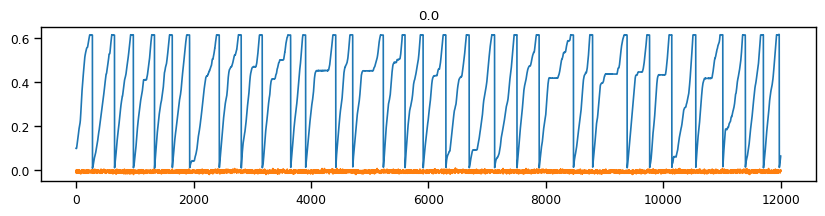

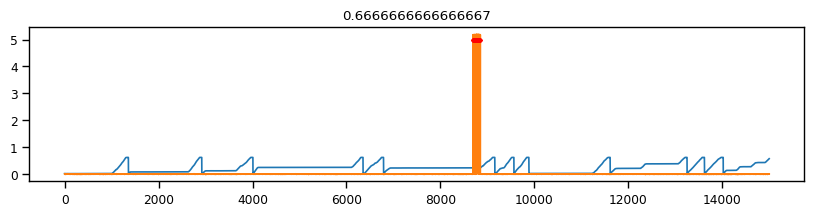

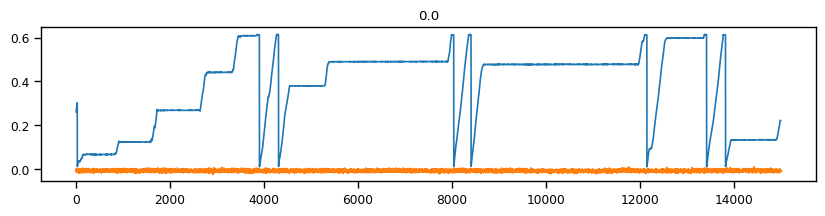

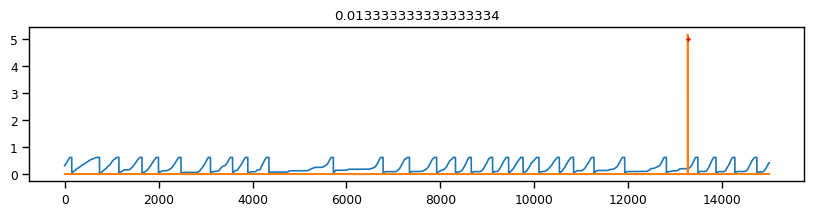

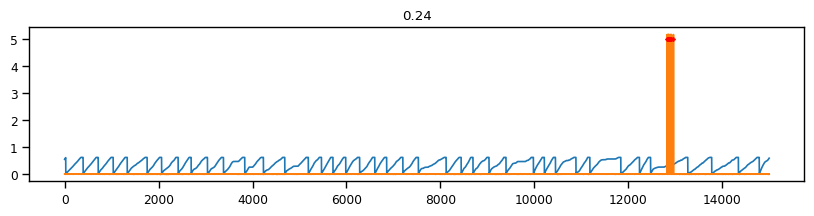

In [12]:
df2['percentlicks'] = np.nan
for ind, row in df2.iterrows():
    fs, ax = plt.subplots(1, figsize=(10, 2))
    licks = row['Lick']
    numlicks = np.where(licks>1)[0]
    df2.loc[ind, 'percentlicks'] = (np.size(np.where(licks>1)[0])/np.size(licks))*100
    ax.plot(row['Behavior'])
    ax.plot(row['Lick'])
    ax.plot(np.where(licks>1)[0], np.ones_like(np.where(licks>1)[0])*5, 'r+', markersize=3)
    ax.set_title(df2.loc[ind, 'percentlicks'])

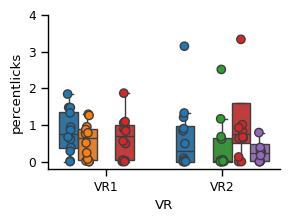

In [13]:
fs, ax = plt.subplots(1)
sub_data = df2[df2['Paradigm'].str.contains('|'.join(['Control', 'Before', 'During', 'RecallDay1']))]
sns.boxplot(data=sub_data, y='percentlicks', x='VR', hue='Paradigm', showfliers=False, ax=ax)
sns.stripplot(data=sub_data, y='percentlicks', x='VR', hue='Paradigm', dodge=True, size=6, ax=ax, linewidth=1)
ax.legend().remove()
ax.set_ylim((-0.2, 4))
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Lickingbehavior_NovNov.pdf'), bbox_inches='tight')

## Compare freezing percent in NovNov and FamNov

In [14]:
df1 = pd.read_pickle(os.path.join(FolderName, 'all_combined_Paradigm2.pkl'))
df1['Type'] = 'NovNov'

In [15]:
df2 = pd.read_pickle(os.path.join(FolderName, 'all_combined_Paradigm1A.pkl'))
df3 = pd.read_pickle(os.path.join(FolderName, 'all_combined_Paradigm1B.pkl'))
df2['Type'] = 'FamNov'
df3['Type'] = 'FamNov'

In [16]:
df = pd.concat((df1, df2, df3))
df = df[df['Shocktype'].str.contains('1mA_6')]
subdata = df[df['Paradigm'].str.contains('RecallDay1')]

In [17]:
# calculate the Cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

order: FamNov Cohens d: 1.377
order: FamNov Variance d: 12.89
order: FamNov Variance d: 12.78
(12,) (12,)
Type: FamNov, tstst -3.224, p-value 0.008
order: NovNov Cohens d: 0.917
order: NovNov Variance d: 4.74
order: NovNov Variance d: 8.66
(12,) (12,)
Type: NovNov, tstst -2.569, p-value 0.026
order: FamNov Cohens d: 0.893
order: FamNov Variance d: 11.09
order: FamNov Variance d: 16.54
(12,) (12,)
Type: FamNov, tstst -2.395, p-value 0.036
order: NovNov Cohens d: 0.076
order: NovNov Variance d: 9.41
order: NovNov Variance d: 9.14
(12,) (12,)
Type: NovNov, tstst -0.270, p-value 0.792


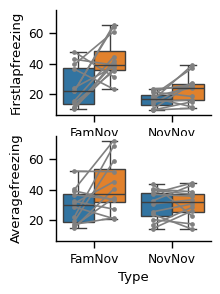

In [18]:
fs, ax = plt.subplots(2, 1, sharey='all')
order = ['FamNov', 'NovNov']
columns = [ 'Firstlapfreezing', 'Averagefreezing']
for n, i in enumerate(columns):
    sns.boxplot(subdata, x="Type", order=order, y=i, hue='VR', ax=ax[n], showfliers=False)
    for n2, j in enumerate(order):
        data1 = subdata[(subdata['Type']==j) & (subdata['VR']=='VR1')][i].to_numpy()
        data2 = subdata[(subdata['Type']==j) & (subdata['VR']=='VR2')][i].to_numpy()
        print('order: %s Cohens d: %.3f' % (j, cohend(data2, data1)))
        print('order: %s Variance d: %.2f' %(j, np.nanstd(data1)))
        print('order: %s Variance d: %.2f' %(j, np.nanstd(data2)))
        ax[n].plot([n2-0.25, n2+0.25], [data1, data2], '.-', color='grey')
        print(data1.shape, data2.shape)
        t, p = scipy.stats.ttest_rel(data1, data2)
        print('Type: %s, tstst %0.3f, p-value %0.3f' %(j, t, p))
for a in ax:
    a.legend().remove()
sns.despine(fs)
fs.set_size_inches((2, 3))
# fs.savefig(os.path.join(SaveFigureFolder, 'NovNov_FamFam comparison.pdf'), bbox_inches='tight')